In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import callbacks
from keras.models import Sequential

import wordcloud
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
#Can't use .glob with tab delimiter; importing each dataset manually
a = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/amazon_cells_labelled.txt', names = ['sentence', 'score'], sep ='\t', header = None)
i = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/imdb_labelled.txt', names = ['sentence', 'score'], sep ='\t', header = None)
y = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/yelp_labelled.txt', names = ['sentence', 'score'], sep ='\t', header = None)

In [344]:
a.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [345]:
i.head()

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [346]:
y.head()

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [347]:
df = pd.concat([a, i, y])
df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [348]:
df = df.reset_index(drop = True)
df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [349]:
#The documentation stated there was an even split of data, but we see that's not true--need to make sure the discrepancy isn't too, too bad
df['score'].value_counts()

1    1386
0    1362
Name: score, dtype: int64

In [350]:
#I'm satisfied with this split
df.describe()

,score
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [351]:
#Drop case throughout the DataFrame
df['sentence'] = df['sentence'].astype(str).str.lower()

In [352]:
#Use RET to tokenize and remove all characters on white space
tokenizer = RegexpTokenizer('\w+')
df['s_tokenized'] = df['sentence'].apply(tokenizer.tokenize)

In [353]:
df

,sentence,score,s_tokenized
0,so there is no way for me to plug it in here i...,0,"[so, there, is, no, way, for, me, to, plug, it..."
1,"good case, excellent value.",1,"[good, case, excellent, value]"
2,great for the jawbone.,1,"[great, for, the, jawbone]"
3,tied to charger for conversations lasting more...,0,"[tied, to, charger, for, conversations, lastin..."
4,the mic is great.,1,"[the, mic, is, great]"
...,...,...,...
2743,i think food should have flavor and texture an...,0,"[i, think, food, should, have, flavor, and, te..."
2744,appetite instantly gone.,0,"[appetite, instantly, gone]"
2745,overall i was not impressed and would not go b...,0,"[overall, i, was, not, impressed, and, would, ..."
2746,"the whole experience was underwhelming, and i ...",0,"[the, whole, experience, was, underwhelming, a..."


In [354]:
#Declare which stopword list to use
stops = set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [355]:
#Removing stopwords from the English list found
df['s_tokenized'] = df['s_tokenized'].apply(lambda x: [i for i in x if i not in stops])
df['s_tokenized']

0                  [way, plug, us, unless, go, converter]
1                          [good, case, excellent, value]
2                                        [great, jawbone]
3       [tied, charger, conversations, lasting, 45, mi...
4                                            [mic, great]
                              ...                        
2743              [think, food, flavor, texture, lacking]
2744                          [appetite, instantly, gone]
2745                [overall, impressed, would, go, back]
2746    [whole, experience, underwhelming, think, go, ...
2747    [wasted, enough, life, poured, salt, wound, dr...
Name: s_tokenized, Length: 2748, dtype: object

In [356]:
#Create a "top most frequent tokens list" for lemmatization--code credit: Library Carpentry
df['s_string'] = df['s_tokenized'].apply(lambda x: ' '.join([j for j in x if len(j) > 2]))
s_tokenized2 = nltk.tokenize.word_tokenize(' '.join([word for word in df['s_string']]))
fdist = FreqDist(s_tokenized2)
fdist

FreqDist({'good': 230, 'great': 210, 'movie': 182, 'phone': 168, 'film': 163, 'one': 146, 'food': 126, 'like': 125, 'place': 114, 'time': 112, ...})

In [357]:
#Remove words that do not appear more than once
df['s_fdist'] = df['s_tokenized'].apply(lambda x: ' '.join([l for l in x if fdist[l] >= 1 ]))

In [358]:
#Use lemmatization to group word forms into a single item
lemmatizer = WordNetLemmatizer()
df['s_tokenized_lem'] = df['s_fdist'].apply(lemmatizer.lemmatize)

In [359]:
df.dtypes

sentence           object
score               int64
s_tokenized        object
s_string           object
s_fdist            object
s_tokenized_lem    object
dtype: object

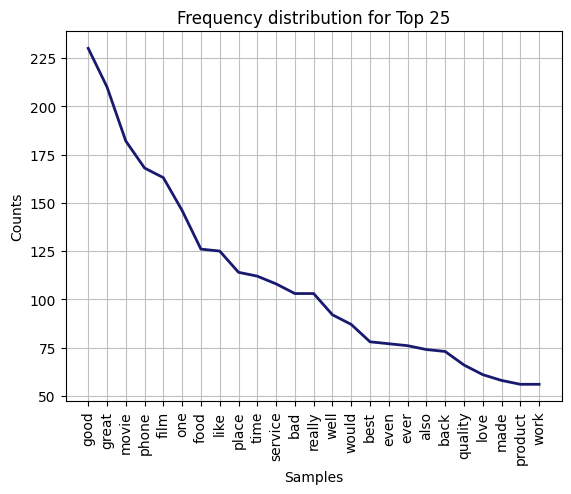

<AxesSubplot: title={'center': 'Frequency distribution for Top 25'}, xlabel='Samples', ylabel='Counts'>

In [360]:
#Create visulization of the top 20 words for wordcloud
words_lem = ' '.join([word for word in df['s_tokenized_lem']])
fdist.plot(25, color = 'midnightblue', title = 'Frequency distribution for Top 25')

(-0.5, 599.5, 399.5, -0.5)

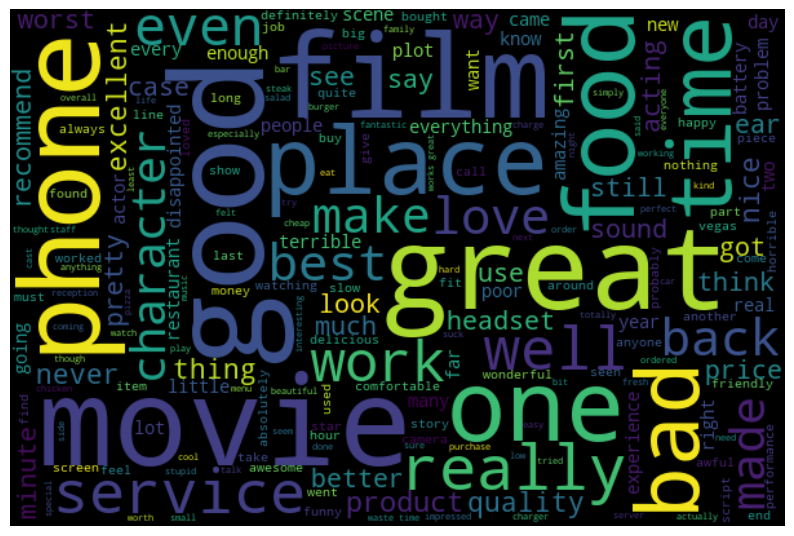

In [361]:
#Create nifty wordcloud of of top performing words
wordcloud = WordCloud(width = 600, height = 400, random_state = 22, max_font_size = 100).generate(words_lem)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [362]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_2_clean_data.txt', index = True, header = True)

In [363]:
#Create Training and Test, keeping the recommended 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(df['s_tokenized_lem'], df['score'], test_size = .20, random_state = 22)

In [364]:
#Use Tokenizer() to change words into numbers
tokenizer2 = Tokenizer(num_words = None)
tokenizer2.fit_on_texts(X_train)
X_train = tokenizer2.texts_to_sequences(X_train)
X_test = tokenizer2.texts_to_sequences(X_test)

In [365]:
len(X_train)

2198

In [366]:
#Check to see how many words ended up in the Test/Train list
len(X_test)

550

In [367]:
# (Code credit: karthiks, 2018)
vocab_words = len(tokenizer.word_index) + 1
max_length = max(len(word) for word in X_test)

In [368]:
#Padding sequences to the same length
X_train = pad_sequences(X_train, padding= 'post', maxlen = max_length)
X_test = pad_sequences(X_test, padding= 'post', maxlen = max_length)
X_test[0:2]

array([[  16,   11, 2328,  345, 3796,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [2336,  167,    5, 1492, 1389,    2,  668,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])

In [369]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_2_complete_data.txt', index = True, header = True)

In [370]:
#Define and compile model

model = Sequential()
embedding_layer = Embedding(input_dim = vocab_words, output_dim = 2000, input_length = max_length)
model.add(embedding_layer)
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 17, 2000)          9760000   
                                                                 
 dropout_8 (Dropout)         (None, 17, 2000)          0         
                                                                 
 flatten_8 (Flatten)         (None, 34000)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 34001     
                                                                 
Total params: 9,794,001
Trainable params: 9,794,001
Non-trainable params: 0
_________________________________________________________________
None


In [371]:
earlystop = callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
history = model.fit(X_train, y_train, batch_size = 150, epochs = 20, verbose = 1, validation_data = (X_test, y_test), callbacks = [earlystop])

Epoch 1/20
15/15 [==============================] - 3s 160ms/step - loss: 0.6916 - acc: 0.5187 - val_loss: 0.6732 - val_acc: 0.5545
Epoch 2/20
15/15 [==============================] - 2s 145ms/step - loss: 0.5861 - acc: 0.7803 - val_loss: 0.6147 - val_acc: 0.7618
Epoch 3/20
15/15 [==============================] - 2s 145ms/step - loss: 0.4385 - acc: 0.9204 - val_loss: 0.5385 - val_acc: 0.8018
Epoch 4/20
15/15 [==============================] - 2s 145ms/step - loss: 0.2759 - acc: 0.9604 - val_loss: 0.4810 - val_acc: 0.8055
Epoch 5/20
15/15 [==============================] - 2s 143ms/step - loss: 0.1687 - acc: 0.9722 - val_loss: 0.4539 - val_acc: 0.8055
Epoch 6/20
15/15 [==============================] - 2s 143ms/step - loss: 0.1090 - acc: 0.9804 - val_loss: 0.4565 - val_acc: 0.8055
Epoch 7/20
15/15 [==============================] - 2s 143ms/step - loss: 0.0770 - acc: 0.9873 - val_loss: 0.4576 - val_acc: 0.7982
Epoch 8/20
15/15 [==============================] - 2s 144ms/step - loss: 0.

In [373]:
#Declare Keras variables to use for visualizations
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 640x480 with 0 Axes>

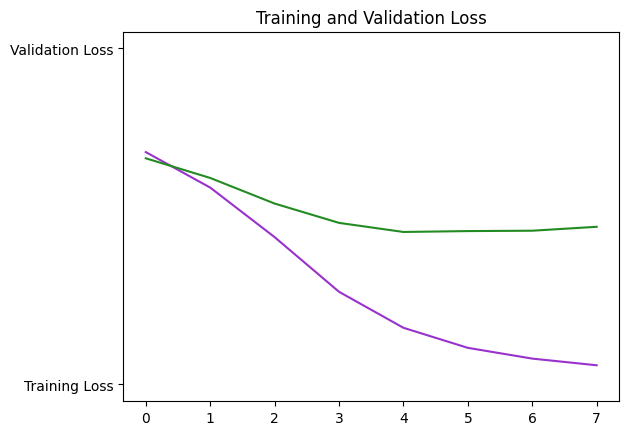

<Figure size 640x480 with 0 Axes>

In [375]:
plt.plot(epochs, loss, 'darkorchid', 'Training Loss')
plt.plot(epochs, val_loss, 'forestgreen', 'Validation Loss')
plt.title('Training and Validation Loss')
plt.figure()

<Figure size 640x480 with 0 Axes>

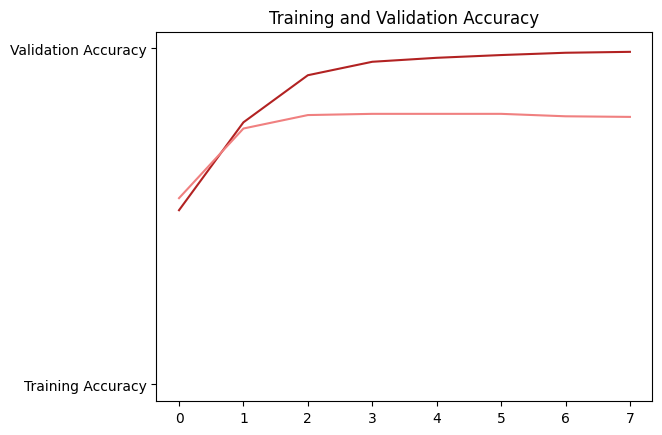

<Figure size 640x480 with 0 Axes>

In [374]:
plt.plot(epochs, acc, 'firebrick', 'Training Accuracy')
plt.plot(epochs, val_acc, 'lightcoral', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()

In [372]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.45390960574150085
Test accuracy: 0.8054545521736145


In [376]:
model.save('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_2_model.txt')

INFO:tensorflow:Assets written to: E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_2_model.txt\assets


INFO:tensorflow:Assets written to: E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 2/data/213_2_model.txt\assets
